### Setting up the Environment

Before we begin, we need to ensure that we have all the necessary tools. We will install PyBOP from its development branch and upgrade some dependencies:

In [7]:
%pip install --upgrade pip ipywidgets pybamm -q
%pip install git+https://github.com/pybop-team/PyBOP.git@develop -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Next, we import the added packages plus any additional dependencies,

In [8]:
import numpy as np
import plotly.graph_objects as go
import pybamm
import pybop


## Optimising the Parameters
First, we define the model to be used for the parameter optimisation,

In [9]:
# Example synthetic data generation
parameter_set = pybop.ParameterSet.pybamm("Chen2020")
parameter_set = pybamm.get_size_distribution_parameters(parameter_set)
synth_model = pybop.lithium_ion.DFN(
    parameter_set=parameter_set, options={"particle size": "distribution"}
)

### Simulating Forward Model

We can then simulate the model using the `predict` method, with a default constant current to generate voltage data.

In [ ]:
n_points = 650
t_eval = np.linspace(0, 1600 + 1000, n_points)
current = np.concatenate(
    [np.ones(400) * parameter_set["Nominal cell capacity [A.h]"], np.zeros(250)]
)
init_soc = 0.5

In [ ]:
dataset = pybop.Dataset(
    {
        "Time [s]": t_eval,
        "Current function [A]": current,
    }
)
synth_model.build(dataset, init_soc=init_soc)
synth_model.signal = ["Voltage [V]"]

### Plotting the Dataset
The `pybop.plot_dataset` function is used to visualize the dataset, showing the voltage over time.

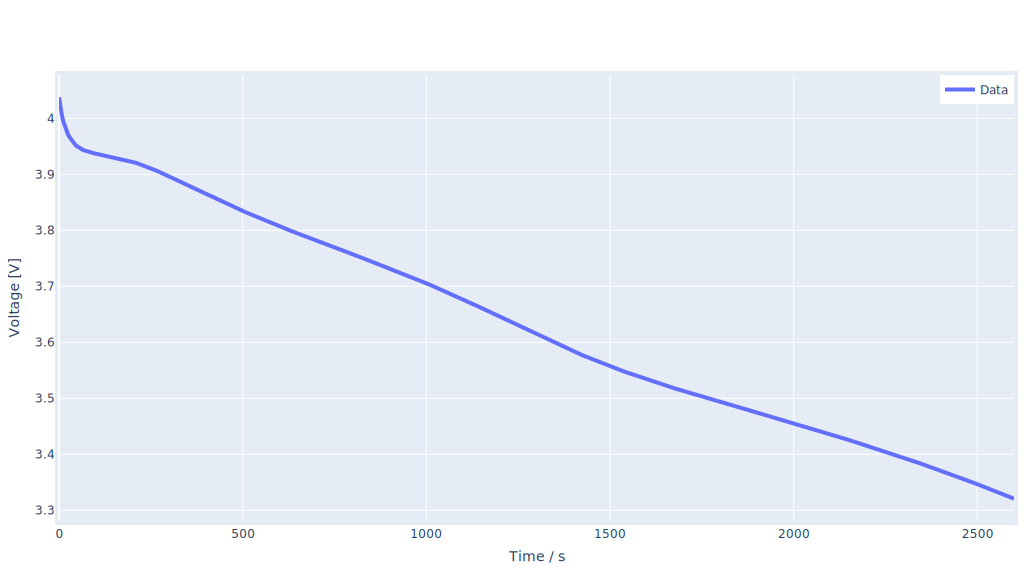

In [10]:
values = synth_model.predict(t_eval=t_eval)
dataset["Voltage [V]"] = values["Voltage [V]"].data
pybop.plot_dataset(dataset);